
════════════════════
        AUTOMATED CREDIT SCORING SYSTEM 
════════════════════

📌 BUSINESS PROBLEM:
   - Manual credit assessment takes 3-5 days
   - applicants drop off due to slow turnaround,during month end when file flow is 3x more, with channel pressure for file disbursement, files take more time for appraisal, loss of time and productivity of appriasers and credit hub.
   - High operational cost: Average ₹500 per application processed manually
     
To develop a machine learning-based credit risk prediction system that not only accurately classifies loan applications into risk categories (P1-P4) but also optimizes the credit approval workflow by implementing an intelligent priority queue system that reduces average Turnaround Time (TAT) by 45.5% while ensuring premium customers receive expedited service.

🎯 SOLUTION:
   - ML-powered instant credit scoring
   - Automated risk segmentation (P1/P2/P3/P4)(P1 being the best customer followed by P2,P3 and P4
   - Real-time decisioning in <5 seconds

💰 EXPECTED IMPACT:
   - Reduce TAT from 60 hours to 32.5 hours
   - Process more applications with same team
   - Save in operational costs
   

📊 DATASET:
   - 42,066 loan applications
   - 79 features (credit bureau + demographics)
   - Target: 4-class risk segments (P1=Premium to P4=High Risk)

🛠️ APPROACH:
   1. Use statistical methods-chi square, ANOVA and check multicollinearity for relevant features
   2. Ordinal Encoding 
   3. Gradient Boosting Classifier with class balancing (as P2 class dominates among all classes)
   

═══════════════════════════════════════════════════════════════════


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
a1 = pd.read_excel(r"C:\SWSetup\CRM-\CIBIL_data.xlsx")
a2 = pd.read_excel(r"C:\SWSetup\CRM-\customer_data.xlsx")

In [5]:
df1 = a1.copy()
df2 = a2.copy()

In [7]:
df1.head()

customer_id  time_since_recent_payment  time_since_first_deliquency  \
0            1                        549                           35   
1            2                         47                       -99999   
2            3                        302                           11   
3            4                     -99999                       -99999   
4            5                        583                       -99999   

   time_since_recent_deliquency  num_times_delinquent  max_delinquency_level  \
0                            15                    11                     29   
1                        -99999                     0                 -99999   
2                             3                     9                     25   
3                        -99999                     0                 -99999   
4                        -99999                     0                 -99999   

   max_recent_level_of_deliq  num_deliq_6mts  num_deliq_12mts  \
0                         29               0                0   
1                          0               0                0   
2                         25               1                9   
3                          0               0                0   
4                          0               0                0   

   num_deliq_6_12mts  ...  pct_CC_enq_L6m_of_L12m  pct_PL_enq_L6m_of_ever  \
0                  0  ...                     0.0                     0.0   
1                  0  ...                     0.0                     0.0   
2                  8  ...                     0.0                     0.0   
3                  0  ...                     0.0                     0.0   
4                  0  ...                     0.0                     0.0   

   pct_CC_enq_L6m_of_ever  max_unsec_exposure_inPct  HL_Flag  GL_Flag  \
0                     0.0                    13.333        1        0   
1                     0.0                     0.860        0        0   
2                     0.0                  5741.667        1        0   
3                     0.0                     9.900        0        0   
4                     0.0                -99999.000        0        0   

   last_prod_enq2  first_prod_enq2  Credit_Score  Approved_Flag  
0              PL               PL           696             P2  
1    ConsumerLoan     ConsumerLoan           685             P2  
2    ConsumerLoan           others           693             P2  
3          others           others           673             P2  
4              AL               AL           753             P1  

[5 rows x 62 columns]

In [174]:
df2.head()

customer_id  Total_TL  Tot_Closed_TL  Tot_Active_TL  Total_TL_opened_L6M  \
0            1         5              4              1                    0   
1            2         1              0              1                    0   
2            3         8              0              8                    1   
3            4         1              0              1                    1   
4            5         3              2              1                    0   

   Tot_TL_closed_L6M  pct_tl_open_L6M  pct_tl_closed_L6M  pct_active_tl  \
0                  0            0.000                0.0          0.200   
1                  0            0.000                0.0          1.000   
2                  0            0.125                0.0          1.000   
3                  0            1.000                0.0          1.000   
4                  0            0.000                0.0          0.333   

   pct_closed_tl  ...  CC_TL  Consumer_TL  Gold_TL  Home_TL  PL_TL  \
0          0.800  ...      0            0        1        0      4   
1          0.000  ...      0            1        0        0      0   
2          0.000  ...      0            6        1        0      0   
3          0.000  ...      0            0        0        0      0   
4          0.667  ...      0            0        0        0      0   

   Secured_TL  Unsecured_TL  Other_TL  Age_Oldest_TL  Age_Newest_TL  
0           1             4         0             72             18  
1           0             1         0              7              7  
2           2             6         0             47              2  
3           0             1         1              5              5  
4           3             0         2            131             32  

[5 rows x 26 columns]

### 📊 Feature Descriptions — Credit Risk Modelling Dataset

| **Feature Name** | **Description** |
|------------------|-----------------|
| `time_since_recent_payment` | Time since the most recent payment was made |
| `time_since_first_deliquency` | Time since the first delinquency (missed payment) |
| `time_since_recent_deliquency` | Time since the most recent delinquency |
| `num_times_delinquent` | Total number of times the applicant has been delinquent |
| `max_delinquency_level` | Maximum level of delinquency ever recorded |
| `max_recent_level_of_deliq` | Maximum recent level of delinquency |
| `num_deliq_6mts` | Number of delinquencies in the last 6 months |
| `num_deliq_12mts` | Number of delinquencies in the last 12 months |
| `num_deliq_6_12mts` | Number of delinquencies between 6 and 12 months ago |
| `max_deliq_6mts` | Maximum delinquency level in the last 6 months |
| `max_deliq_12mts` | Maximum delinquency level in the last 12 months |
| `num_times_30p_dpd` | Number of times payments were 30+ days past due |
| `num_times_60p_dpd` | Number of times payments were 60+ days past due |
| `num_std` | Number of standard (on-time/full) payments |
| `num_std_6mts` | Number of standard payments in the last 6 months |
| `num_std_12mts` | Number of standard payments in the last 12 months |
| `num_sub` | Number of substandard (partial) payments |
| `num_sub_6mts` | Number of substandard payments in the last 6 months |
| `num_sub_12mts` | Number of substandard payments in the last 12 months |
| `num_dbt` | Number of doubtful payments |
| `num_dbt_6mts` | Number of doubtful payments in the last 6 months |
| `num_dbt_12mts` | Number of doubtful payments in the last 12 months |
| `num_lss` | Number of loss accounts |
| `num_lss_6mts` | Number of loss accounts in the last 6 months |
| `num_lss_12mts` | Number of loss accounts in the last 12 months |
| `recent_level_of_deliq` | Most recent delinquency level |
| `tot_enq` | Total number of credit enquiries |
| `CC_enq` | Credit Card enquiries |
| `CC_enq_L6m` | Credit Card enquiries in the last 6 months |
| `CC_enq_L12m` | Credit Card enquiries in the last 12 months |
| `PL_enq` | Personal Loan enquiries |
| `PL_enq_L6m` | Personal Loan enquiries in the last 6 months |
| `PL_enq_L12m` | Personal Loan enquiries in the last 12 months |
| `time_since_recent_enq` | Time since the most recent enquiry |
| `enq_L12m` | Total enquiries in the last 12 months |
| `enq_L6m` | Total enquiries in the last 6 months |
| `enq_L3m` | Total enquiries in the last 3 months |
| `MARITALSTATUS` | Marital status of the applicant |
| `EDUCATION` | Education level |
| `AGE` | Age of the applicant |
| `GENDER` | Gender of the applicant |
| `NETMONTHLYINCOME` | Net monthly income |
| `Time_With_Curr_Empr` | Time with the current employer |
| `pct_of_active_TLs_ever` | Percentage of active trade lines ever |
| `pct_opened_TLs_L6m_of_L12m` | Percentage of accounts opened in last 6 months compared to last 12 months |
| `pct_currentBal_all_TL` | Percentage of current balance across all trade lines |
| `CC_utilization` | Credit Card utilization percentage |
| `CC_Flag` | Credit Card account flag |
| `PL_utilization` | Personal Loan utilization percentage |
| `PL_Flag` | Personal Loan account flag |
| `pct_PL_enq_L6m_of_L12m` | Percentage of PL enquiries in last 6 months vs last 12 months |
| `pct_CC_enq_L6m_of_L12m` | Percentage of CC enquiries in last 6 months vs last 12 months |
| `pct_PL_enq_L6m_of_ever` | Percentage of PL enquiries in last 6 months to total enquiries |
| `pct_CC_enq_L6m_of_ever` | Percentage of CC enquiries in last 6 months to total enquiries |
| `max_unsec_exposure_inPct` | Maximum unsecured exposure (in percent) |
| `HL_Flag` | Housing Loan account flag |
| `GL_Flag` | Gold Loan account flag |
| `last_prod_enq2` | Latest product enquired for |
| `first_prod_enq2` | First product enquired for |
| `Credit_Score` | Applicant’s credit score |
| `Approved_Flag` | Priority/app



### 🧾 Feature Descriptions – Bureau Account Summary

| **Variable Name** | **Description** |
|--------------------|-----------------|
| `Total_TL` | Total trade lines/accounts in Bureau |
| `Tot_Closed_TL` | Total closed trade lines/accounts |
| `Tot_Active_TL` | Total active accounts |
| `Total_TL_opened_L6M` | Total accounts opened in last 6 Months |
| `Tot_TL_closed_L6M` | Total accounts closed in last 6 months |
| `pct_tl_open_L6M` | Percent accounts opened in last 6 months |
| `pct_tl_closed_L6M` | Percent accounts closed in last 6 months |
| `pct_active_tl` | Percent active accounts |
| `pct_closed_tl` | Percent closed accounts |
| `Total_TL_opened_L12M` | Total accounts opened in last 12 Months |
| `Tot_TL_closed_L12M` | Total accounts closed in last 12 months |
| `pct_tl_open_L12M` | Percent accounts opened in last 12 months |
| `pct_tl_closed_L12M` | Percent accounts closed in last 12 months |
| `Tot_Missed_Pmnt` | Total missed Payments |
| `Auto_TL` | Count of Automobile accounts |
| `CC_TL` | Count of Credit card accounts |
| `Consumer_TL` | Count of Consumer goods accounts |
| `Gold_TL` | Count of Gold loan accounts |
| `Home_TL` | Count of Housing loan accounts |
| `PL_TL` | Count of Personal loan accounts |
| `Secured_TL` | Count of secured accounts |
| `Unsecured_TL` | Count of unsecured accounts |
| `Other_TL` | Count of other accounts |
| `Age_Oldest_TL` | Age of oldest opened account |
| `Age_Newest_TL` | Age of newest opened account |


In [117]:
df1.shape

(51336, 62)

In [17]:
df2.shape

(51336, 26)

In [119]:
df1.describe()

customer_id  time_since_recent_payment  time_since_first_deliquency  \
count  51336.000000               51336.000000                 51336.000000   
mean   25668.500000               -8129.961314                -70020.091320   
std    14819.571046               27749.328514                 45823.312757   
min        1.000000              -99999.000000                -99999.000000   
25%    12834.750000                  46.000000                -99999.000000   
50%    25668.500000                  70.000000                -99999.000000   
75%    38502.250000                 161.000000                     8.000000   
max    51336.000000                6065.000000                    35.000000   

       time_since_recent_deliquency  num_times_delinquent  \
count                  51336.000000          51336.000000   
mean                  -70022.375838              1.573749   
std                    45819.820741              4.165012   
min                   -99999.000000              0.000000   
25%                   -99999.000000              0.000000   
50%                   -99999.000000              0.000000   
75%                        3.000000              1.000000   
max                       35.000000             74.000000   

       max_delinquency_level  max_recent_level_of_deliq  num_deliq_6mts  \
count           51336.000000               51336.000000    51336.000000   
mean           -70003.987085                  13.521953        0.184977   
std             45847.976100                  53.336976        0.710240   
min            -99999.000000                   0.000000        0.000000   
25%            -99999.000000                   0.000000        0.000000   
50%            -99999.000000                   0.000000        0.000000   
75%                15.000000                  10.000000        0.000000   
max               900.000000                 900.000000       12.000000   

       num_deliq_12mts  num_deliq_6_12mts  ...  PL_utilization       PL_Flag  \
count     51336.000000       51336.000000  ...    51336.000000  51336.000000   
mean          0.480053           0.295076  ...   -86556.225194      0.167874   
std           1.522210           1.027471  ...    34111.414750      0.373758   
min           0.000000           0.000000  ...   -99999.000000      0.000000   
25%           0.000000           0.000000  ...   -99999.000000      0.000000   
50%           0.000000           0.000000  ...   -99999.000000      0.000000   
75%           0.000000           0.000000  ...   -99999.000000      0.000000   
max          28.000000          20.000000  ...        1.708000      1.000000   

       pct_PL_enq_L6m_of_L12m  pct_CC_enq_L6m_of_L12m  pct_PL_enq_L6m_of_ever  \
count            51336.000000            51336.000000            51336.000000   
mean                 0.190414                0.065182                0.170492   
std                  0.376218                0.235706                0.350209   
min                  0.000000                0.000000                0.000000   
25%                  0.000000                0.000000                0.000000   
50%                  0.000000                0.000000                0.000000   
75%                  0.000000                0.000000                0.000000   
max                  1.000000                1.000000                1.000000   

       pct_CC_enq_L6m_of_ever  max_unsec_exposure_inPct       HL_Flag  \
count            51336.000000              51336.000000  51336.000000   
mean                 0.056302             -45127.943635      0.271116   
std                  0.213506              49795.784556      0.444540   
min                  0.000000             -99999.000000      0.000000   
25%                  0.000000             -99999.000000      0.000000   
50%                  0.000000                  0.333000      0.000000   
75%                  0.000000                  2.164250      1.000000   
max                  1.000000      

In [21]:
df2.describe()

customer_id      Total_TL  Tot_Closed_TL  Tot_Active_TL  \
count  51336.000000  51336.000000   51336.000000   51336.000000   
mean   25668.500000      4.858598       2.770415       2.088184   
std    14819.571046      7.177116       5.941680       2.290774   
min        1.000000      1.000000       0.000000       0.000000   
25%    12834.750000      1.000000       0.000000       1.000000   
50%    25668.500000      2.000000       1.000000       1.000000   
75%    38502.250000      5.000000       3.000000       3.000000   
max    51336.000000    235.000000     216.000000      47.000000   

       Total_TL_opened_L6M  Tot_TL_closed_L6M  pct_tl_open_L6M  \
count         51336.000000       51336.000000     51336.000000   
mean              0.736754           0.428919         0.184574   
std               1.296717           0.989972         0.297414   
min               0.000000           0.000000         0.000000   
25%               0.000000           0.000000         0.000000   
50%               0.000000           0.000000         0.000000   
75%               1.000000           1.000000         0.308000   
max              27.000000          19.000000         1.000000   

       pct_tl_closed_L6M  pct_active_tl  pct_closed_tl  ...         CC_TL  \
count       51336.000000   51336.000000   51336.000000  ...  51336.000000   
mean            0.089095       0.577542       0.422458  ...      0.124981   
std             0.205635       0.379867       0.379867  ...      0.505201   
min             0.000000       0.000000       0.000000  ...      0.000000   
25%             0.000000       0.250000       0.000000  ...      0.000000   
50%             0.000000       0.556000       0.444000  ...      0.000000   
75%             0.053000       1.000000       0.750000  ...      0.000000   
max             1.000000       1.000000       1.000000  ...     27.000000   

        Consumer_TL       Gold_TL       Home_TL         PL_TL    Secured_TL  \
count  51336.000000  51336.000000  51336.000000  51336.000000  51336.000000   
mean       1.136084      1.561847      0.070146      0.282511      2.844904   
std        2.227997      5.376434      0.340861      0.858168      6.187177   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      1.000000   
75%        1.000000      1.000000      0.000000      0.000000      3.000000   
max       41.000000    235.000000     10.000000     29.000000    235.000000   

       Unsecured_TL      Other_TL  Age_Oldest_TL  Age_Newest_TL  
count  51336.000000  51336.000000   51336.000000   51336.000000  
mean       2.013694      1.089762     -32.575639     -62.149525  
std        3.198322      2.417496    2791.869609    2790.818622  
min        0.000000      0.000000  -99999.000000  -99999.000000  
25%        0.000000      0.000000      14.000000       4.000000  
50%        1.000000      0.000000      33.000000       8.000000  
75%        2.000000      1.000000      64.000000      17.000000  
max       55.000000     80.000000     392.000000     392.000000  

[8 rows x 26 columns]

# DATA CLEANING
**Key Actions**:
- Removed -99999 placeholder values
- Dropped highly correlated features


In [7]:
#Removing rows with values as -99999, removed 40 rows
df2 = df2[(df2['Age_Oldest_TL']!= -99999) & (df2['Age_Newest_TL'] != -99999)]

In [13]:
df2.shape

(51296, 26)

In [123]:
df2.describe()

customer_id      Total_TL  Tot_Closed_TL  Tot_Active_TL  \
count  51296.000000  51296.000000   51296.000000   51296.000000   
mean   25668.574353      4.861471       2.772321       2.089149   
std    14819.611579      7.179141       5.943536       2.291375   
min        1.000000      1.000000       0.000000       0.000000   
25%    12836.750000      1.000000       0.000000       1.000000   
50%    25666.500000      2.000000       1.000000       1.000000   
75%    38503.250000      5.000000       3.000000       3.000000   
max    51336.000000    235.000000     216.000000      47.000000   

       Total_TL_opened_L6M  Tot_TL_closed_L6M  pct_tl_open_L6M  \
count         51296.000000       51296.000000     51296.000000   
mean              0.737328           0.429254         0.184718   
std               1.297059           0.990286         0.297486   
min               0.000000           0.000000         0.000000   
25%               0.000000           0.000000         0.000000   
50%               0.000000           0.000000         0.000000   
75%               1.000000           1.000000         0.312000   
max              27.000000          19.000000         1.000000   

       pct_tl_closed_L6M  pct_active_tl  pct_closed_tl  ...         CC_TL  \
count       51296.000000   51296.000000   51296.000000  ...  51296.000000   
mean            0.089164       0.577349       0.422651  ...      0.125078   
std             0.205700       0.379804       0.379804  ...      0.505386   
min             0.000000       0.000000       0.000000  ...      0.000000   
25%             0.000000       0.250000       0.000000  ...      0.000000   
50%             0.000000       0.556000       0.444000  ...      0.000000   
75%             0.054000       1.000000       0.750000  ...      0.000000   
max             1.000000       1.000000       1.000000  ...     27.000000   

        Consumer_TL       Gold_TL       Home_TL         PL_TL    Secured_TL  \
count  51296.000000  51296.000000  51296.000000  51296.000000  51296.000000   
mean       1.136970      1.563046      0.070181      0.282712      2.846752   
std        2.228639      5.378357      0.340963      0.858461      6.189165   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      1.000000   
75%        1.000000      1.000000      0.000000      0.000000      3.000000   
max       41.000000    235.000000     10.000000     29.000000    235.000000   

       Unsecured_TL      Other_TL  Age_Oldest_TL  Age_Newest_TL  
count  51296.000000  51296.000000   51296.000000   51296.000000  
mean       2.014718      1.089773      45.376969      15.780022  
std        3.199333      2.418314      41.737151      21.995676  
min        0.000000      0.000000       0.000000       0.000000  
25%        0.000000      0.000000      14.000000       4.000000  
50%        1.000000      0.000000      33.000000       8.000000  
75%        2.000000      1.000000      64.000000      17.000000  
max       55.000000     80.000000     392.000000     392.000000  

[8 rows x 26 columns]

In [9]:
#checking columns with values as -99999
cols = [i for i in df1.columns if (df1[i] == -99999).any()]
cols

['time_since_recent_payment',
 'time_since_first_deliquency',
 'time_since_recent_deliquency',
 'max_delinquency_level',
 'max_deliq_6mts',
 'max_deliq_12mts',
 'tot_enq',
 'CC_enq',
 'CC_enq_L6m',
 'CC_enq_L12m',
 'PL_enq',
 'PL_enq_L6m',
 'PL_enq_L12m',
 'time_since_recent_enq',
 'enq_L12m',
 'enq_L6m',
 'enq_L3m',
 'pct_currentBal_all_TL',
 'CC_utilization',
 'PL_utilization',
 'max_unsec_exposure_inPct']

In [11]:
#Removing columns where -99999 occurs greater than 10000 times
cols_to_be_removed = []
for i in df1.columns:
    if (df1[i] == -99999).sum() > 10000:
       cols_to_be_removed.append(i) 

In [13]:
cols_to_be_removed

['time_since_first_deliquency',
 'time_since_recent_deliquency',
 'max_delinquency_level',
 'max_deliq_6mts',
 'max_deliq_12mts',
 'CC_utilization',
 'PL_utilization',
 'max_unsec_exposure_inPct']

In [15]:
#Columns removed
df1 = df1.drop(cols_to_be_removed,axis=1)

In [17]:
#Removing rows with -99999
for i in df1.columns:
    df1 = df1.loc[df1[i]!=-99999]

In [135]:
df1.describe()

customer_id  time_since_recent_payment  num_times_delinquent  \
count  42066.000000               42066.000000          42066.000000   
mean   25648.699092                 218.670542              1.742856   
std    14844.725592                 422.403322              4.390511   
min        1.000000                   2.000000              0.000000   
25%    12775.250000                  51.000000              0.000000   
50%    25705.500000                  71.000000              0.000000   
75%    38517.750000                 146.000000              1.000000   
max    51336.000000                6065.000000             74.000000   

       max_recent_level_of_deliq  num_deliq_6mts  num_deliq_12mts  \
count               42066.000000    42066.000000     42066.000000   
mean                   14.314078        0.211620         0.548567   
std                    54.055108        0.757924         1.625478   
min                     0.000000        0.000000         0.000000   
25%                     0.000000        0.000000         0.000000   
50%                     0.000000        0.000000         0.000000   
75%                    15.000000        0.000000         0.000000   
max                   900.000000       12.000000        28.000000   

       num_deliq_6_12mts  num_times_30p_dpd  num_times_60p_dpd       num_std  \
count       42066.000000       42066.000000       42066.000000  42066.000000   
mean            0.336947           0.773261           0.438858      9.117910   
std             1.097333           2.860401           2.148351     21.513725   
min             0.000000           0.000000           0.000000      0.000000   
25%             0.000000           0.000000           0.000000      0.000000   
50%             0.000000           0.000000           0.000000      0.000000   
75%             0.000000           0.000000           0.000000      8.000000   
max            20.000000          60.000000          52.000000    422.000000   

       ...  pct_currentBal_all_TL       CC_Flag       PL_Flag  \
count  ...           42066.000000  42066.000000  42066.000000   
mean   ...               0.883651      0.102957      0.193054   
std    ...              40.621309      0.303907      0.394700   
min    ...               0.000000      0.000000      0.000000   
25%    ...               0.152000      0.000000      0.000000   
50%    ...               0.600000      0.000000      0.000000   
75%    ...               0.860000      0.000000      0.000000   
max    ...            6327.500000      1.000000      1.000000   

       pct_PL_enq_L6m_of_L12m  pct_CC_enq_L6m_of_L12m  pct_PL_enq_L6m_of_ever  \
count            42066.000000            42066.000000            42066.000000   
mean                 0.219182                0.074830                0.195511   
std                  0.395111                0.250652                0.367427   
min                  0.000000                0.000000                0.000000   
25%                  0.000000                0.000000                0.000000   
50%                  0.000000                0.000000                0.000000   
75%                  0.000000                0.000000                0.000000   
max                  1.000000                1.000000                1.000000   

       pct_CC_enq_L6m_of_ever       HL_Flag       GL_Flag  Credit_Score  
count            42066.000000  42066.000000  42066.000000  42066.000000  
mean                 0.064183      0.252223      0.056578    679.326915  
std                  0.225984      0.434294      0.231037     21.133347  
min                  0.000000      0.000000      0.000000    469.000000  
25%                  0.000000      0.000000      0.000000    668.000000  
50%                  0.000000      0.000000      0.000000    679.000000  
75%                  0.000000      1.000000      0.000000    690.000000  
max                  1.000000      1.000000      1.000000    809.000000  

[8 rows x 48 columns]

In [39]:
#Removed 9270 rows and 8 columns
df1.shape

(42066, 54)

In [41]:
df1.isna().sum()

customer_id                   0
time_since_recent_payment     0
num_times_delinquent          0
max_recent_level_of_deliq     0
num_deliq_6mts                0
num_deliq_12mts               0
num_deliq_6_12mts             0
num_times_30p_dpd             0
num_times_60p_dpd             0
num_std                       0
num_std_6mts                  0
num_std_12mts                 0
num_sub                       0
num_sub_6mts                  0
num_sub_12mts                 0
num_dbt                       0
num_dbt_6mts                  0
num_dbt_12mts                 0
num_lss                       0
num_lss_6mts                  0
num_lss_12mts                 0
recent_level_of_deliq         0
tot_enq                       0
CC_enq                        0
CC_enq_L6m                    0
CC_enq_L12m                   0
PL_enq                        0
PL_enq_L6m                    0
PL_enq_L12m                   0
time_since_recent_enq         0
enq_L12m                      0
enq_L6m 

In [43]:
df2.isna().sum()

customer_id             0
Total_TL                0
Tot_Closed_TL           0
Tot_Active_TL           0
Total_TL_opened_L6M     0
Tot_TL_closed_L6M       0
pct_tl_open_L6M         0
pct_tl_closed_L6M       0
pct_active_tl           0
pct_closed_tl           0
Total_TL_opened_L12M    0
Tot_TL_closed_L12M      0
pct_tl_open_L12M        0
pct_tl_closed_L12M      0
Tot_Missed_Pmnt         0
Auto_TL                 0
CC_TL                   0
Consumer_TL             0
Gold_TL                 0
Home_TL                 0
PL_TL                   0
Secured_TL              0
Unsecured_TL            0
Other_TL                0
Age_Oldest_TL           0
Age_Newest_TL           0
dtype: int64

In [188]:
#Fetching common columns names
for i in list(df1.columns):
    if i in list(df2.columns):
        print(i)

customer_id


In [19]:
#Merging both df1 and df2
df = pd.merge(df1,df2,how='inner',left_on='customer_id',right_on='customer_id')

In [49]:
df.head(5)

customer_id  time_since_recent_payment  num_times_delinquent  \
0            1                        549                    11   
1            2                         47                     0   
2            3                        302                     9   
3            5                        583                     0   
4            6                        245                    14   

   max_recent_level_of_deliq  num_deliq_6mts  num_deliq_12mts  \
0                         29               0                0   
1                          0               0                0   
2                         25               1                9   
3                          0               0                0   
4                        270               0                0   

   num_deliq_6_12mts  num_times_30p_dpd  num_times_60p_dpd  num_std  ...  \
0                  0                  0                  0       21  ...   
1                  0                  0                  0        0  ...   
2                  8                  0                  0       10  ...   
3                  0                  0                  0       53  ...   
4                  0                 13                 11        5  ...   

   CC_TL  Consumer_TL  Gold_TL  Home_TL  PL_TL  Secured_TL  Unsecured_TL  \
0      0            0        1        0      4           1             4   
1      0            1        0        0      0           0             1   
2      0            6        1        0      0           2             6   
3      0            0        0        0      0           3             0   
4      0            0        2        0      0           6             0   

   Other_TL  Age_Oldest_TL  Age_Newest_TL  
0         0             72             18  
1         0              7              7  
2         0             47              2  
3         2            131             32  
4         0            150             17  

[5 rows x 79 columns]

In [51]:
df.describe()

customer_id  time_since_recent_payment  num_times_delinquent  \
count  42064.000000               42064.000000          42064.000000   
mean   25649.827477                 218.601607              1.742939   
std    14844.173396                 422.282417              4.390599   
min        1.000000                   2.000000              0.000000   
25%    12776.750000                  51.000000              0.000000   
50%    25706.500000                  71.000000              0.000000   
75%    38518.250000                 146.000000              1.000000   
max    51336.000000                6065.000000             74.000000   

       max_recent_level_of_deliq  num_deliq_6mts  num_deliq_12mts  \
count               42064.000000     42064.00000     42064.000000   
mean                   14.314758         0.21163         0.548593   
std                    54.056303         0.75794         1.625512   
min                     0.000000         0.00000         0.000000   
25%                     0.000000         0.00000         0.000000   
50%                     0.000000         0.00000         0.000000   
75%                    15.000000         0.00000         0.000000   
max                   900.000000        12.00000        28.000000   

       num_deliq_6_12mts  num_times_30p_dpd  num_times_60p_dpd       num_std  \
count       42064.000000       42064.000000       42064.000000  42064.000000   
mean            0.336963           0.773298           0.438879      9.118343   
std             1.097356           2.860464           2.148400     21.514144   
min             0.000000           0.000000           0.000000      0.000000   
25%             0.000000           0.000000           0.000000      0.000000   
50%             0.000000           0.000000           0.000000      0.000000   
75%             0.000000           0.000000           0.000000      8.000000   
max            20.000000          60.000000          52.000000    422.000000   

       ...         CC_TL   Consumer_TL       Gold_TL       Home_TL  \
count  ...  42064.000000  42064.000000  42064.000000  42064.000000   
mean   ...      0.145921      1.362400      1.566304      0.076241   
std    ...      0.549314      2.394966      5.500184      0.358582   
min    ...      0.000000      0.000000      0.000000      0.000000   
25%    ...      0.000000      0.000000      0.000000      0.000000   
50%    ...      0.000000      1.000000      0.000000      0.000000   
75%    ...      0.000000      2.000000      1.000000      0.000000   
max    ...     27.000000     41.000000    235.000000     10.000000   

              PL_TL    Secured_TL  Unsecured_TL      Other_TL  Age_Oldest_TL  \
count  42064.000000  42064.000000  42064.000000  42064.000000   42064.000000   
mean       0.328000      2.921334      2.341646      1.116489      46.498074   
std        0.916368      6.379764      3.405397      2.486801      42.109230   
min        0.000000      0.000000      0.000000      0.000000       0.000000   
25%        0.000000      0.000000      0.000000      0.000000      14.000000   
50%        0.000000      1.000000      1.000000      0.000000      34.000000   
75%        0.000000      3.000000      3.000000      1.000000      65.000000   
max       29.000000    235.000000     55.000000     80.000000     385.000000   

       Age_Newest_TL  
count   42064.000000  
mean       13.970046  
std        18.835191  
min         0.000000  
25%         4.000000  
50%         7.000000  
75%        16.000000  
max       359.000000  

[8 rows x 73 columns]

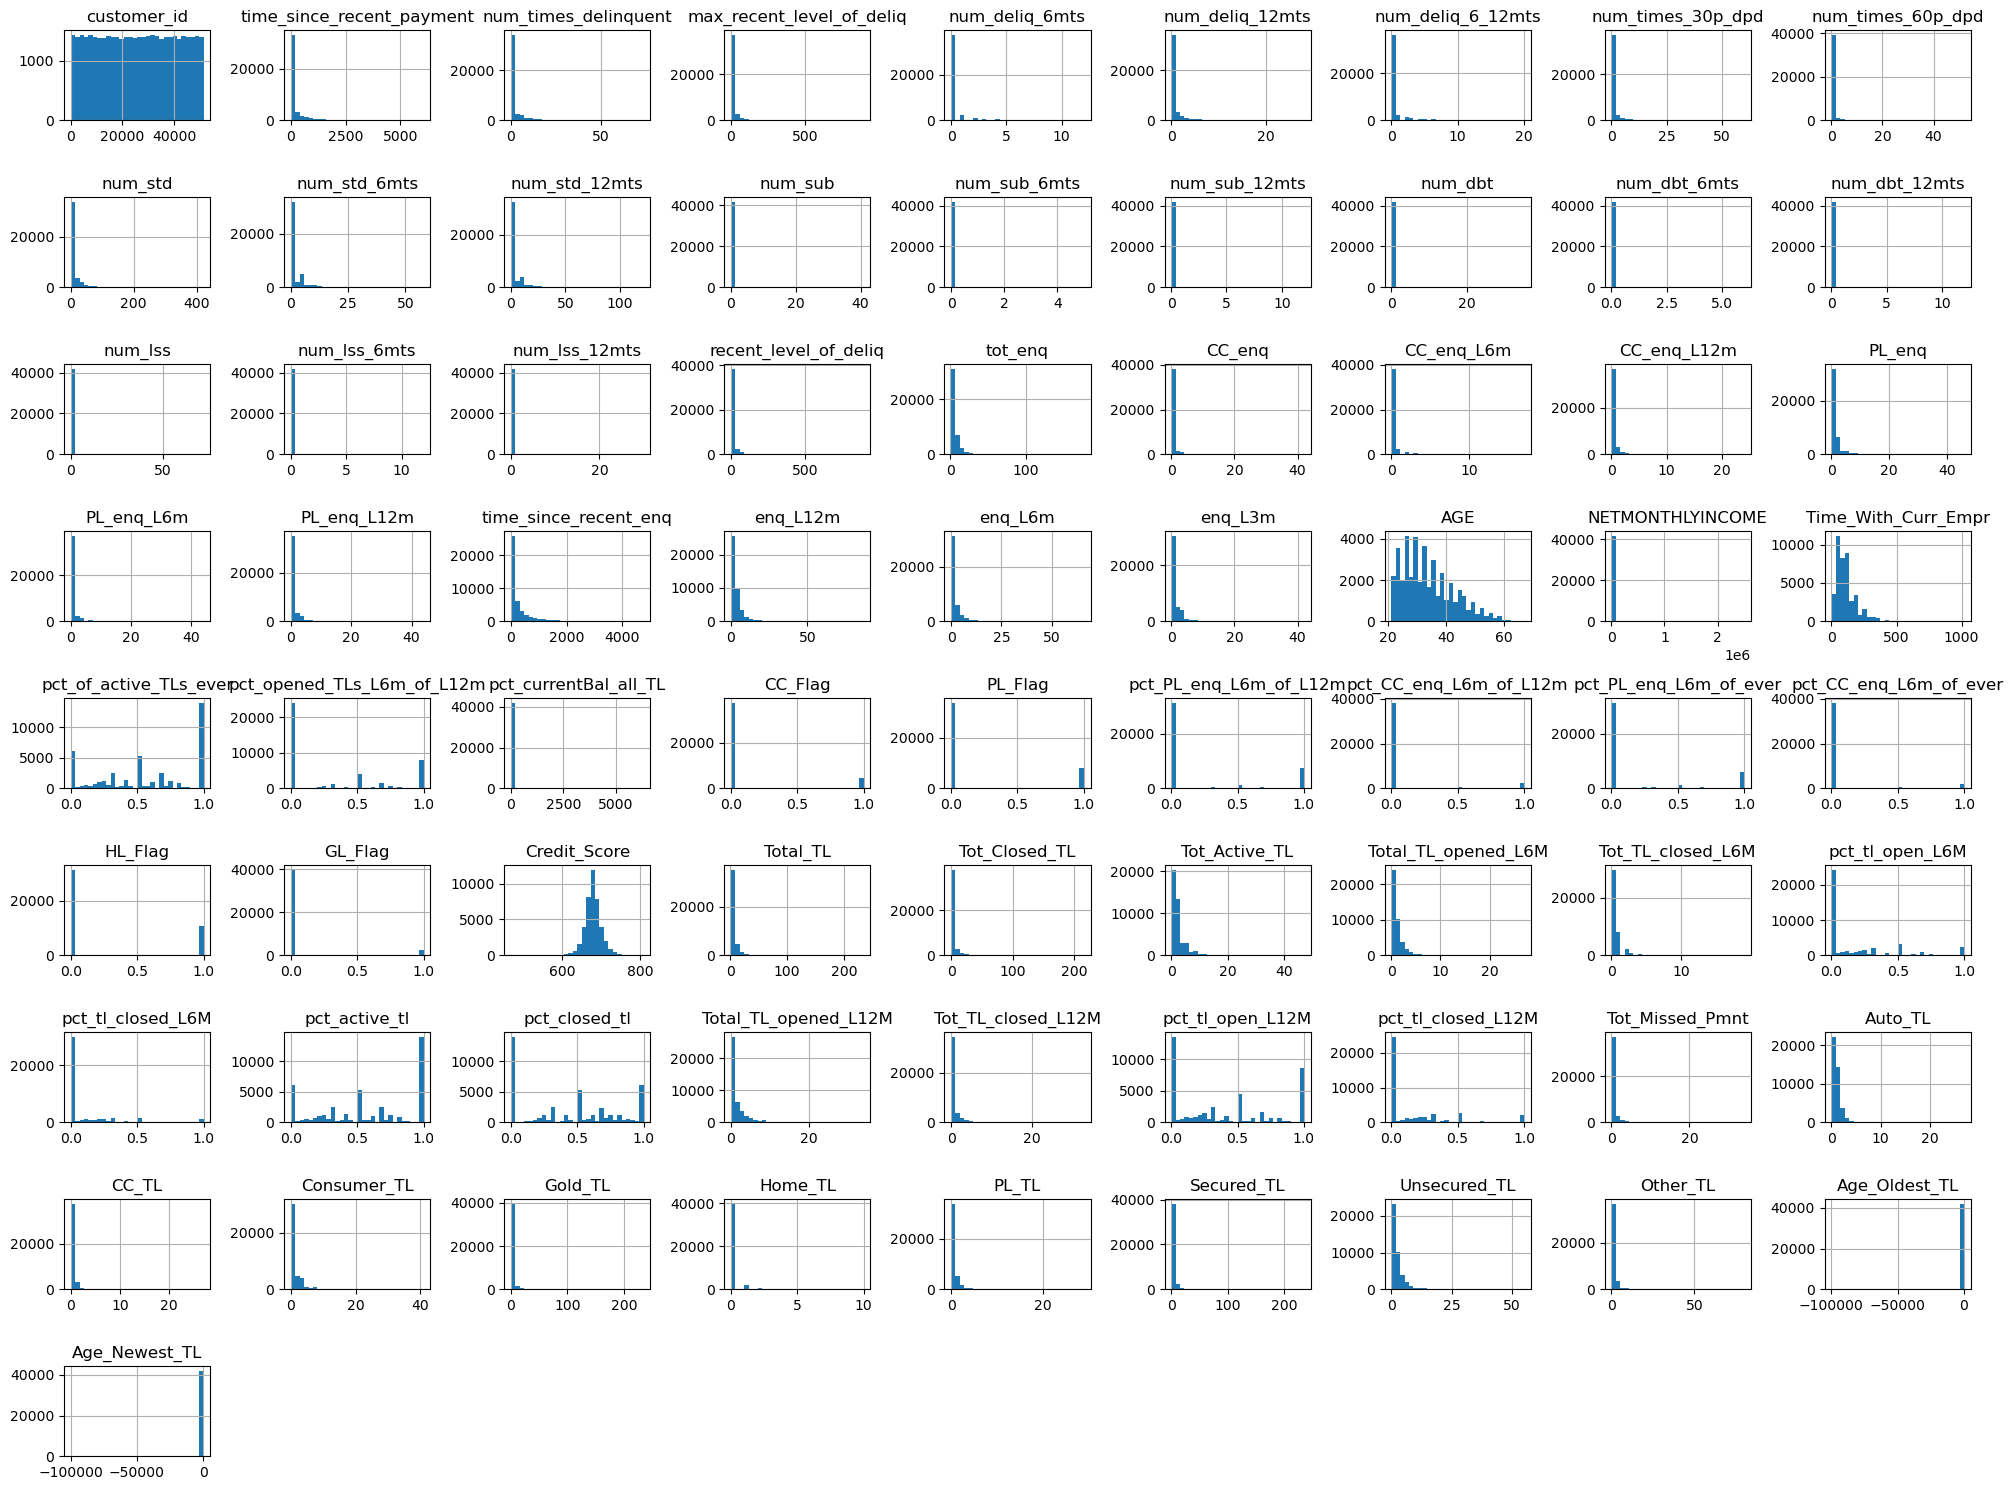

In [23]:
df.hist(figsize=(20, 15), bins=30)
plt.tight_layout()
plt.show()

**Majority of Numerical Features Are Highly Skewed**

**1) Removed all features having 'last 12 months' as it overlaps with features with last 6 months**

**2) Check VIF and ANOVA :**

VIF < 6 --Keep low_vif_columns

VIF>6 :

 1)**ANOVA Significant** - Review features
 
 2)**Not ANOVA significant** - Drop features

In [21]:
#Treating numeric columns
numeric_columns=[]
for i in df:
    if df[i].dtype!='object' and i not in ['customer_id','Approved_Flag']:
        numeric_columns.append(i)

In [23]:
vif_df = pd.DataFrame()
vif_df['Variable'] = numeric_columns

In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd
import numpy as np

In [27]:
vif_data = df[numeric_columns]
total_cols = vif_data.shape[1]

vif_results = []

for i in range(total_cols):
    vif_value = variance_inflation_factor(vif_data.values, i)
    vif_results.append({
        'Variable': vif_data.columns[i],
        'VIF': vif_value
    })
    print(vif_data.columns[i], vif_value)

time_since_recent_payment 2.735596362883496
num_times_delinquent 8.058344866620015
max_recent_level_of_deliq 5.28509822957689


C:\Users\gauta\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


num_deliq_6mts inf
num_deliq_12mts inf
num_deliq_6_12mts inf
num_times_30p_dpd 13.686719350560617
num_times_60p_dpd 7.9839624415864145
num_std 7.454626707020791
num_std_6mts 17.04923039027949
num_std_12mts 26.938209699217552
num_sub 1.5105786312193388
num_sub_6mts 2.1745403695940784
num_sub_12mts 2.627621311378743
num_dbt 2.298662711169351
num_dbt_6mts 7.362133168731922
num_dbt_12mts 9.482420664615699
num_lss 2.872534203709715
num_lss_6mts 6.531917241062529
num_lss_12mts 8.173469783238957
recent_level_of_deliq 4.827702695295717
tot_enq 21.094946412108815
CC_enq 7.820500694590834
CC_enq_L6m 8.986937670928452
CC_enq_L12m 12.04852511754136
PL_enq 11.428296881927777
PL_enq_L6m 13.226242177783176
PL_enq_L12m 19.390875925113033
time_since_recent_enq 2.147856684040089
enq_L12m 37.512211779565035
enq_L6m 30.742225559243842
enq_L3m 8.93723944444821
AGE 22.321110102049825
NETMONTHLYINCOME 2.8137280312248025
Time_With_Curr_Empr 3.972158997902046
pct_of_active_TLs_ever inf
pct_opened_TLs_L6m_of_L1

In [29]:
vif_df = pd.DataFrame(vif_results)
vif_df

Variable       VIF
0   time_since_recent_payment  2.735596
1        num_times_delinquent  8.058345
2   max_recent_level_of_deliq  5.285098
3              num_deliq_6mts       inf
4             num_deliq_12mts       inf
..                        ...       ...
67                 Secured_TL       inf
68               Unsecured_TL       inf
69                   Other_TL       inf
70              Age_Oldest_TL  8.869955
71              Age_Newest_TL  6.109574

[72 rows x 2 columns]

### REMOVE COLUMNS THAT CONTAIN 12 FROM VIF_DF

In [31]:
vif_df = vif_df[~vif_df['Variable'].str.contains('12')]
vif_df = vif_df.reset_index(drop=True)

In [204]:
vif_df.shape

(56, 2)

### ANOVA

In [33]:
from scipy.stats import f_oneway

In [35]:
cols_for_anova = vif_df['Variable'].tolist()
anova_results = []
target = df['Approved_Flag']

for col in cols_for_anova:
    a=df[col]
    b=target

    group_P1 = [value for value, group in zip(a, b) if group == 'P1']
    group_P2 = [value for value, group in zip(a, b) if group == 'P2']
    group_P3 = [value for value, group in zip(a, b) if group == 'P3']
    group_P4 = [value for value, group in zip(a, b) if group == 'P4']

    f_statistic,p_value=f_oneway(group_P1,group_P2,group_P3,group_P4)
    anova_results.append(p_value)
    
vif_df['ANOVA_pvalue'] = anova_results
vif_df['ANOVA_significant'] = vif_df['ANOVA_pvalue'] < 0.05

In [36]:
vif_df

Variable          VIF   ANOVA_pvalue  ANOVA_significant
0   time_since_recent_payment     2.735596   8.943913e-81               True
1        num_times_delinquent     8.058345   2.489888e-77               True
2   max_recent_level_of_deliq     5.285098   6.699933e-81               True
3              num_deliq_6mts          inf   9.986657e-18               True
4           num_times_30p_dpd    13.686719   2.386001e-69               True
5           num_times_60p_dpd     7.983962   3.383358e-59               True
6                     num_std     7.454627   0.000000e+00               True
7                num_std_6mts    17.049230   0.000000e+00               True
8                     num_sub     1.510579   1.698555e-22               True
9                num_sub_6mts     2.174540   1.657912e-02               True
10                    num_dbt     2.298663   3.135919e-11               True
11               num_dbt_6mts     7.362133   3.367241e-02               True
12                    num_lss     2.872534   9.340556e-03               True
13               num_lss_6mts     6.531917   5.586507e-01              False
14      recent_level_of_deliq     4.827703   1.150955e-97               True
15                    tot_enq    21.094946   0.000000e+00               True
16                     CC_enq     7.820501  1.914706e-206               True
17                 CC_enq_L6m     8.986938   0.000000e+00               True
18                     PL_enq    11.428297   0.000000e+00               True
19                 PL_enq_L6m    13.226242   0.000000e+00               True
20      time_since_recent_enq     2.147857   0.000000e+00               True
21                    enq_L6m    30.742226   0.000000e+00               True
22                    enq_L3m     8.937239   0.000000e+00               True
23                        AGE    22.321110   0.000000e+00               True
24           NETMONTHLYINCOME     2.813728   5.357634e-26               True
25        Time_With_Curr_Empr     3.972159  6.743540e-271               True
26     pct_of_active_TLs_ever          inf  1.501231e-270               True
27      pct_currentBal_all_TL     1.001532   6.082761e-01              False
28                    CC_Flag     3.203980   8.166586e-51               True
29                    PL_Flag     2.888505  9.956383e-146               True
30     pct_PL_enq_L6m_of_ever    23.234491   0.000000e+00               True
31     pct_CC_enq_L6m_of_ever    17.270007   0.000000e+00               True
32                    HL_Flag     2.395388  1.132780e-237               True
33                    GL_Flag     4.349940  4.940656e-324               True
34               Credit_Score  5821.624630   0.000000e+00               True
35                   Total_TL          inf   0.000000e+00               True
36              Tot_Closed_TL          inf   0.000000e+00               True
37              Tot_Active_TL          inf  1.635253e-277               True
38        Total_TL_opened_L6M    11.279266  2.106070e-210               True
39          Tot_TL_closed_L6M     8.283427   1.560105e-44               True
40            pct_tl_open_L6M     7.560006   0.000000e+00               True
41          pct_tl_closed_L6M     5.130879   2.676087e-52               True
42              pct_active_tl          inf  1.501231e-270               True
43              pct_closed_tl  1788.957715  1.501231e-270               True
44            Tot_Missed_Pmnt     2.844042  9.572405e-210               True
45                    Auto_TL          inf  9.310411e-291               True
46                      CC_TL          inf   5.710262e-57               True
47                Consumer_TL          inf   8.412895e-36               True
48                    Gold_TL          inf  3.152466e-170               True
49                    Home_TL          inf   0.000000e+00               True
50                      PL_TL          inf  7.991892e-235               True
51               

In [212]:
vif_df.shape

(56, 4)

In [39]:
low_vif_columns = vif_df[vif_df['VIF'] < 6]['Variable'].tolist()

In [41]:
high_vif_but_not_significant = vif_df[(vif_df['VIF'] > 6) & (vif_df['ANOVA_pvalue'] >=0.05)]
cols_to_drop = high_vif_but_not_significant['Variable'].tolist()
cols_to_drop

['num_lss_6mts']

In [43]:
high_vif_and_significant = vif_df[(vif_df['VIF'] > 6) & (vif_df['ANOVA_pvalue'] < 0.05)]
review_cols = high_vif_and_significant['Variable'].tolist()
review_cols

['num_times_delinquent',
 'num_deliq_6mts',
 'num_times_30p_dpd',
 'num_times_60p_dpd',
 'num_std',
 'num_std_6mts',
 'num_dbt_6mts',
 'tot_enq',
 'CC_enq',
 'CC_enq_L6m',
 'PL_enq',
 'PL_enq_L6m',
 'enq_L6m',
 'enq_L3m',
 'AGE',
 'pct_of_active_TLs_ever',
 'pct_PL_enq_L6m_of_ever',
 'pct_CC_enq_L6m_of_ever',
 'Credit_Score',
 'Total_TL',
 'Tot_Closed_TL',
 'Tot_Active_TL',
 'Total_TL_opened_L6M',
 'Tot_TL_closed_L6M',
 'pct_tl_open_L6M',
 'pct_active_tl',
 'pct_closed_tl',
 'Auto_TL',
 'CC_TL',
 'Consumer_TL',
 'Gold_TL',
 'Home_TL',
 'PL_TL',
 'Secured_TL',
 'Unsecured_TL',
 'Other_TL',
 'Age_Oldest_TL',
 'Age_Newest_TL']

In [220]:
len(review_cols)

38

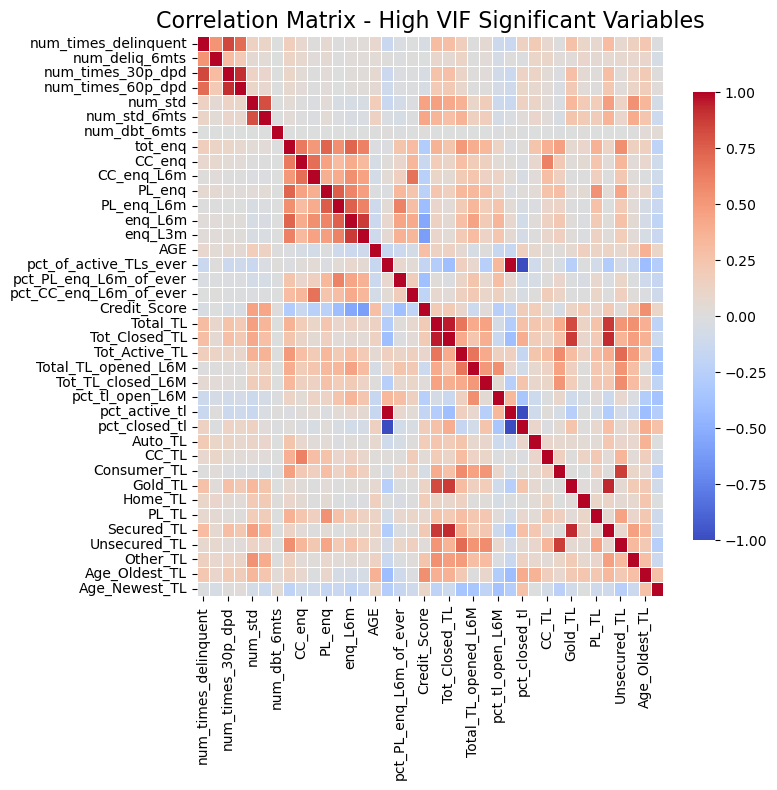

In [45]:
import seaborn as sns
plt.figure(figsize=(8, 8))
corr_matrix = df[review_cols].corr()
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0, 
            linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix - High VIF Significant Variables', fontsize=16)
plt.tight_layout()
plt.show()

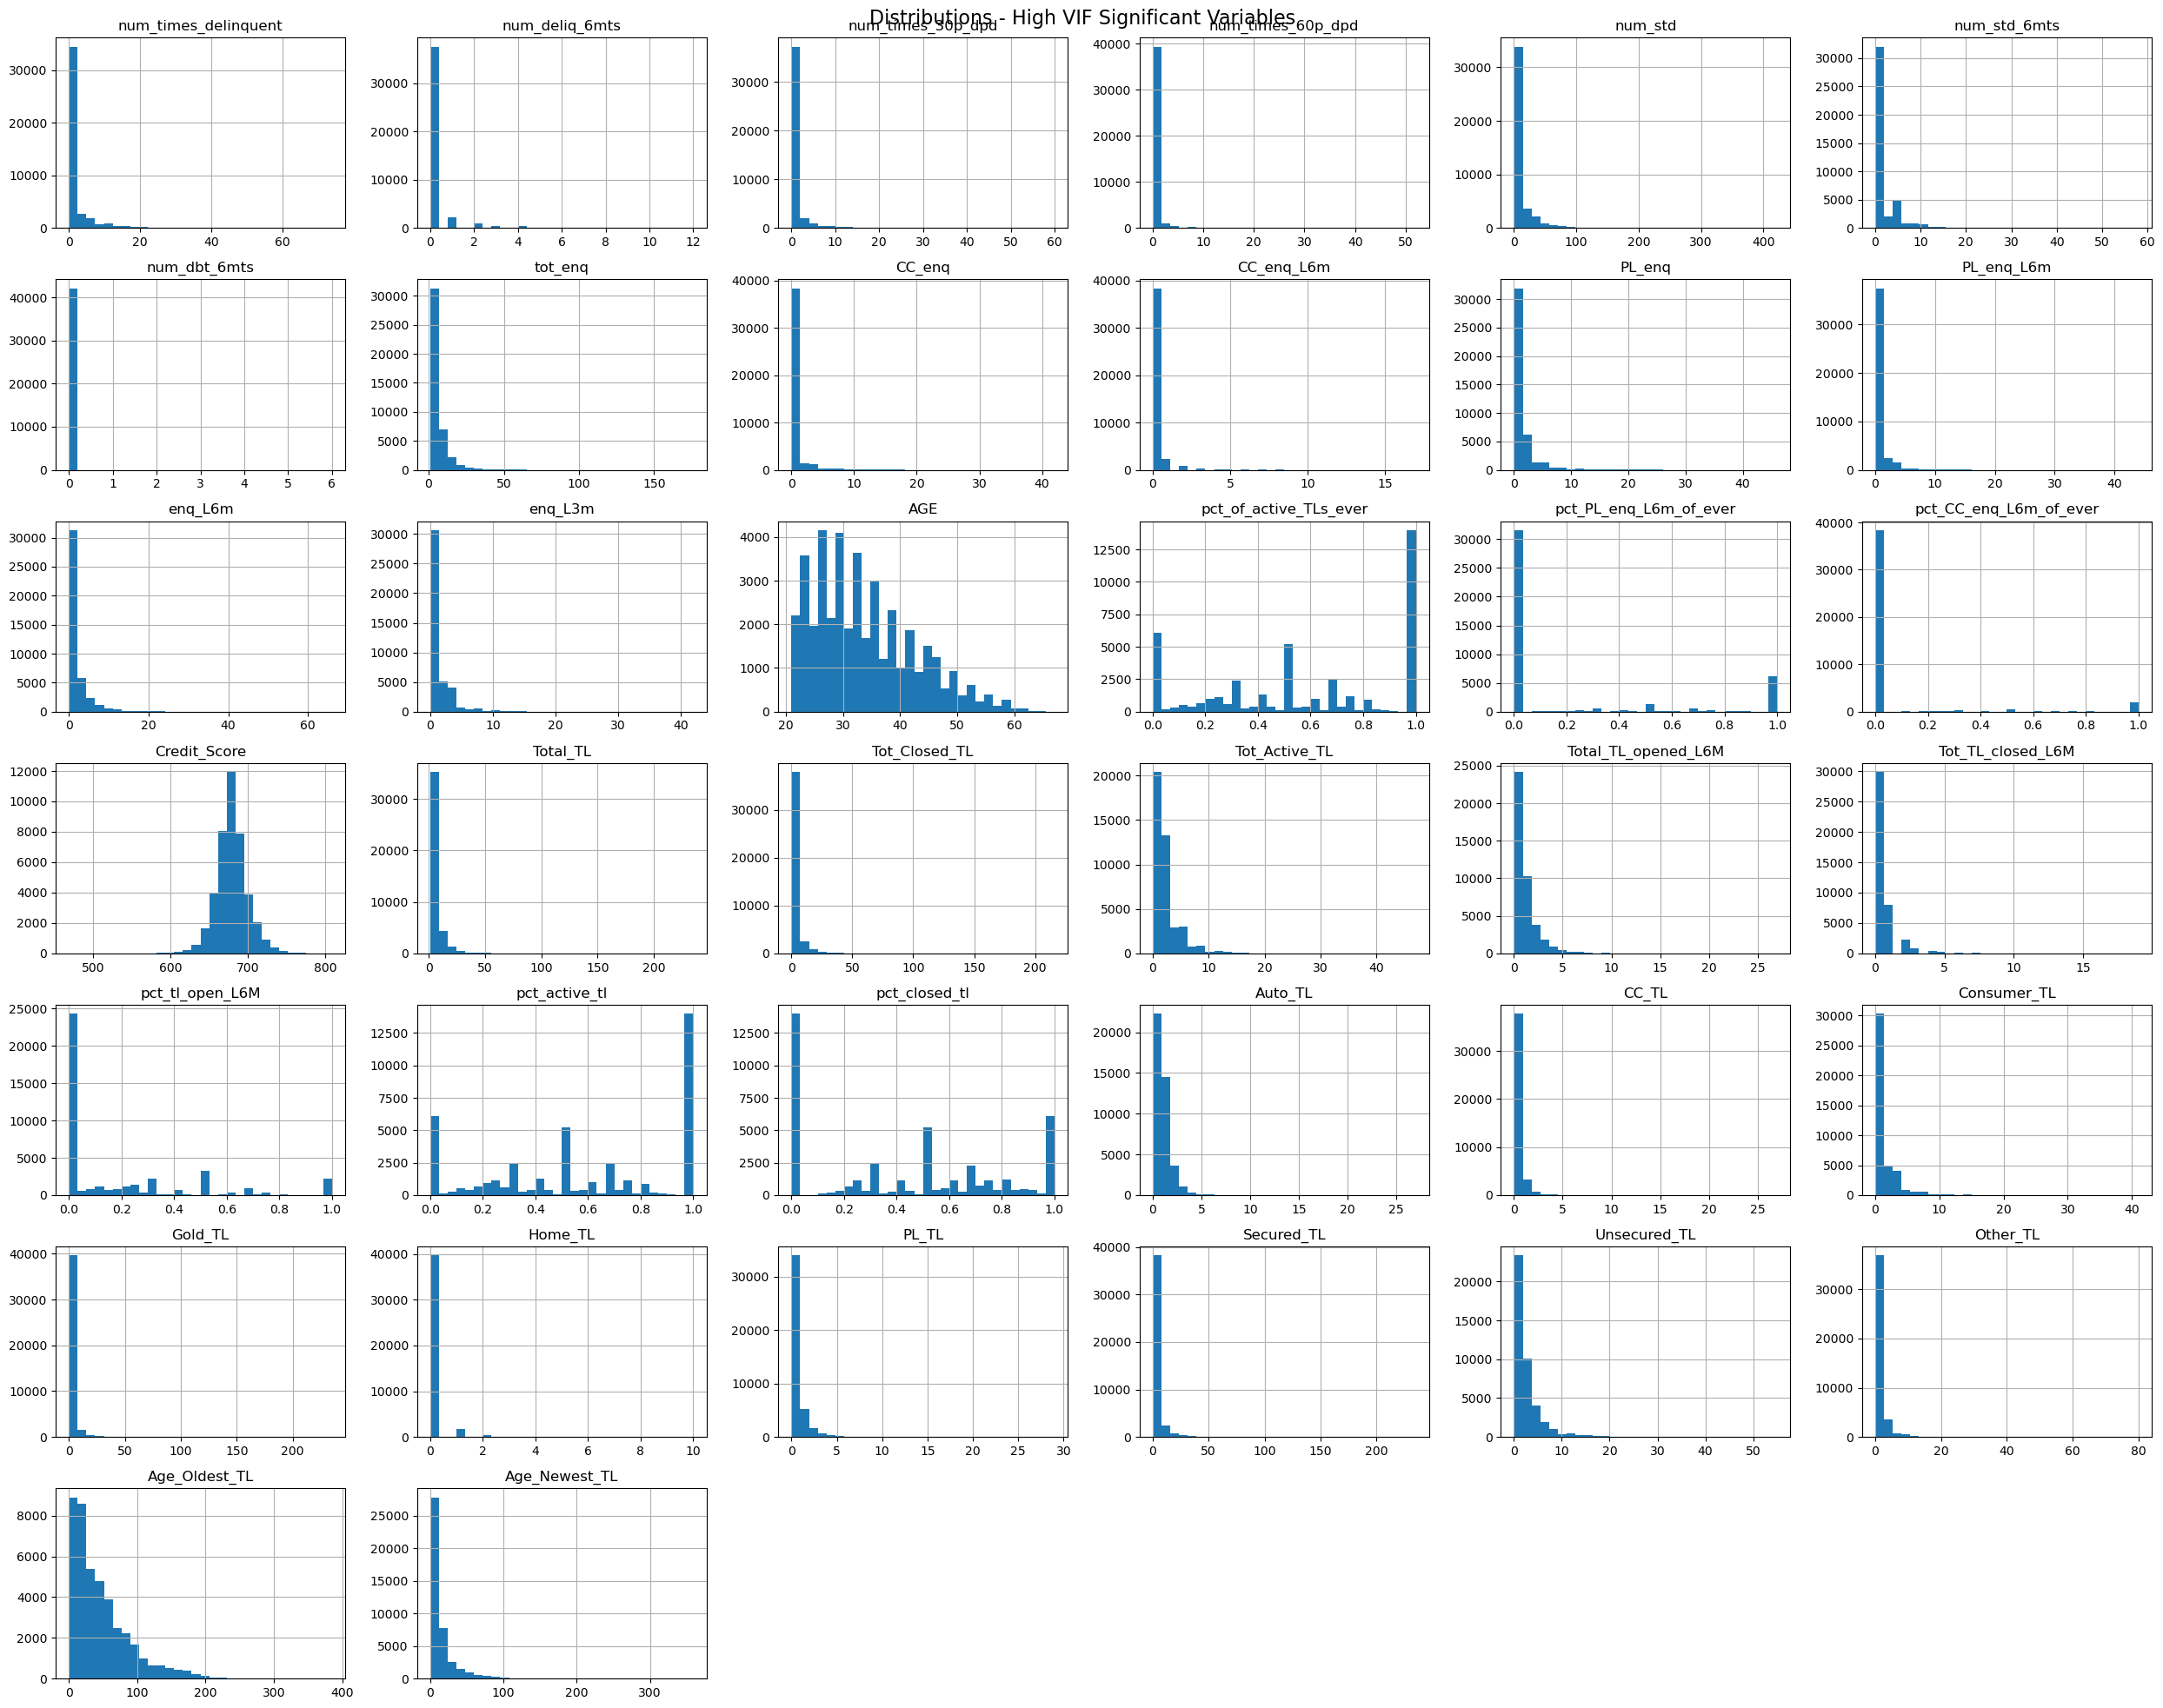

In [61]:
df[review_cols].hist(figsize=(25, 20), bins=30)
plt.suptitle('Distributions - High VIF Significant Variables', fontsize=16)
plt.tight_layout()
plt.show()

### 1)Age and Credit score are important features in credit appraisal hence not removed even with high VIF scores

### 2)Derivable Ratios removed

In [47]:
#Cols to be kept
list_of_cols= ['num_times_30p_dpd','num_times_delinquent','num_std_6mts','CC_enq_L6m','PL_enq_L6m','Credit_Score','Total_TL','Tot_Active_TL',
       'Auto_TL','CC_TL','Consumer_TL','Gold_TL','Home_TL','PL_TL','Secured_TL','Unsecured_TL','Other_TL','Age_Newest_TL','Age_Oldest_TL','AGE']

### HANDLING CATEGORICAL VARIABLES-CHI SQUARE

In [49]:
from scipy.stats import chi2_contingency
import pandas as pd

In [51]:
#Categorical columns
for i in df.columns:
    if df[i].dtype =='object':
        print(i)

MARITALSTATUS
EDUCATION
GENDER
last_prod_enq2
first_prod_enq2
Approved_Flag


In [53]:
for i in ['MARITALSTATUS','EDUCATION','GENDER','last_prod_enq2','first_prod_enq2']:
    contingency_table = pd.crosstab(df[i], df['Approved_Flag'])
    stat,p_value,dof,expected=chi2_contingency(contingency_table)
    print(i,'----',p_value)


MARITALSTATUS ---- 3.578180861038862e-233
EDUCATION ---- 2.6942265249737532e-30
GENDER ---- 1.907936100186563e-05
last_prod_enq2 ---- 0.0
first_prod_enq2 ---- 7.84997610555419e-287


### Since all these values are close to 0, p value< 0.05, reject H0, meaning they have association with output variable

In [55]:
cat_columns= ['MARITALSTATUS','EDUCATION','GENDER','last_prod_enq2','first_prod_enq2']

In [57]:
final_cols = list_of_cols + low_vif_columns + ['Approved_Flag'] + cat_columns

In [59]:
final_cols = list(set(final_cols))
df_final = df[final_cols]

In [236]:
df_final.shape

(42064, 43)

In [61]:
df_final['EDUCATION'].unique()

array(['12TH', 'GRADUATE', 'SSC', 'POST-GRADUATE', 'UNDER GRADUATE',
       'OTHERS', 'PROFESSIONAL'], dtype=object)

### Ordinal encoding
'SSC'-1
'12TH'-2
'UNDER GRADUATE'-3
'GRADUATE'-3
'POST-GRADUATE'-4
'PROFESSIONAL'-3
'OTHERS'-1

In [63]:
df_final['EDUCATION'] = df_final['EDUCATION'].replace({
    'SSC': 1,
    '12TH': 2,
    'GRADUATE': 3,
    'UNDER GRADUATE': 3,
    'POST-GRADUATE': 4,
    'OTHERS': 1,
    'PROFESSIONAL': 3}).astype(int)

C:\Users\gauta\AppData\Local\Temp\ipykernel_103392\485735337.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_final['EDUCATION'] = df_final['EDUCATION'].replace({
C:\Users\gauta\AppData\Local\Temp\ipykernel_103392\485735337.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['EDUCATION'] = df_final['EDUCATION'].replace({


In [65]:
df_encoded = pd.get_dummies(df_final,columns=['MARITALSTATUS','GENDER','last_prod_enq2','first_prod_enq2'])

In [67]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42064 entries, 0 to 42063
Data columns (total 55 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   time_since_recent_enq         42064 non-null  int64  
 1   pct_tl_closed_L6M             42064 non-null  float64
 2   Age_Oldest_TL                 42064 non-null  int64  
 3   PL_enq_L6m                    42064 non-null  int64  
 4   num_sub                       42064 non-null  int64  
 5   CC_Flag                       42064 non-null  int64  
 6   Auto_TL                       42064 non-null  int64  
 7   PL_Flag                       42064 non-null  int64  
 8   GL_Flag                       42064 non-null  int64  
 9   Time_With_Curr_Empr           42064 non-null  int64  
 10  num_dbt                       42064 non-null  int64  
 11  Tot_Missed_Pmnt               42064 non-null  int64  
 12  AGE                           42064 non-null  int64  
 13  r

# MODEL TRAINING
**Algorithm**: GradientBoostingClassifier

In [69]:
X = df_encoded.drop(['Approved_Flag'],axis=1)
y = df_encoded['Approved_Flag']

In [71]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold,cross_val_score

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42,stratify=y)

In [75]:
from sklearn.preprocessing import LabelEncoder

### Label Encoding

In [77]:
le=LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

In [79]:
print(f"Original labels: {le.classes_}")
print(f"Encoded labels: {np.unique(y_train_encoded)}")

Original labels: ['P1' 'P2' 'P3' 'P4']
Encoded labels: [0 1 2 3]


### Imbalanced class handling

In [81]:
from sklearn.utils.class_weight import compute_sample_weight

In [83]:
sample_weights = compute_sample_weight('balanced',y=y_train_encoded)
sample_weights

array([1.99780337, 1.63290955, 2.14282985, ..., 0.41315932, 0.41315932,
       2.14282985])

In [85]:
models = {
    'Random Forest': RandomForestClassifier(
        random_state=42, 
        n_estimators=100, 
        class_weight='balanced'
    ),
    'XGBoost': XGBClassifier(
        random_state=42, 
        eval_metric='mlogloss',
        n_jobs=-1
    ),
    'Gradient Boosting': GradientBoostingClassifier(
        random_state=42
    )}

## Cross validation

In [266]:
for name,model in models.items():
    kf = KFold(n_splits=5,shuffle=True,random_state=42)
    scores= cross_val_score(model,X_train,y_train_encoded,cv=kf,scoring='f1_macro')
    print(name,"average:",np.mean(scores),"Standard Deviation:",np.std(scores))

Random Forest average: 0.978382410196002 Standard Deviation: 0.00164310050949647
XGBoost average: 0.9888181855552854 Standard Deviation: 0.002207736938221923
Gradient Boosting average: 0.9903166739718895 Standard Deviation: 0.0004369870353033468


In [87]:
best_model = GradientBoostingClassifier(random_state=42)

### Random Search CV

In [89]:
from sklearn.model_selection import RandomizedSearchCV
param_distributions = {
    'n_estimators': [100, 150],           # 3→2 options
    'max_depth': [4, 5],                  # 3→2 options
    'learning_rate': [0.1, 0.15],         # 3→2 options
    'subsample': [0.8],                   # 2→1 option
    'min_samples_split': [2],             # 2→1 option
    'min_samples_leaf': [1],              # 2→1 option
    'max_features': ['sqrt']              # 2→1 option
}

In [91]:
random_search = RandomizedSearchCV(
    GradientBoostingClassifier(random_state=42),
    param_distributions,
    n_iter=25,              
    cv=3,                   
    scoring='f1_macro',     
    verbose=2,
    random_state=42,
    return_train_score=True
)

In [93]:
random_search.fit(X_train, y_train_encoded, sample_weight=sample_weights)

C:\Users\gauta\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:318: UserWarning: The total space of parameters 8 is smaller than n_iter=25. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] END learning_rate=0.1, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100, subsample=0.8; total time=  13.6s
[CV] END learning_rate=0.1, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100, subsample=0.8; total time=  13.2s
[CV] END learning_rate=0.1, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100, subsample=0.8; total time=  13.2s
[CV] END learning_rate=0.1, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150, subsample=0.8; total time=  19.8s
[CV] END learning_rate=0.1, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150, subsample=0.8; total time=  19.5s
[CV] END learning_rate=0.1, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=150, subsample=0.8; total time=  19.4s
[CV] END learning_rate

RandomizedSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=42),
                   n_iter=25,
                   param_distributions={'learning_rate': [0.1, 0.15],
                                        'max_depth': [4, 5],
                                        'max_features': ['sqrt'],
                                        'min_samples_leaf': [1],
                                        'min_samples_split': [2],
                                        'n_estimators': [100, 150],
                                        'subsample': [0.8]},
                   random_state=42, return_train_score=True, scoring='f1_macro',
                   verbose=2)

In [101]:
train_predictions = random_search.predict(X_train)
train_accuracy = accuracy_score(y_train_encoded, train_predictions)
train_f1 = f1_score(y_train_encoded, train_predictions, average='macro')
train_f1

0.9984841945060217

In [103]:
print(f"Best parameters: {random_search.best_params_}")
print(f"Best F1 Score: {random_search.best_score_:.4f}")

Best parameters: {'subsample': 0.8, 'n_estimators': 150, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 4, 'learning_rate': 0.1}
Best F1 Score: 0.9884


In [105]:
final_model = random_search.best_estimator_
final_model

GradientBoostingClassifier(max_depth=4, max_features='sqrt', n_estimators=150,
                           random_state=42, subsample=0.8)

In [107]:
y_pred = final_model.predict(X_test)

In [97]:
from sklearn.metrics import classification_report, f1_score, accuracy_score

In [109]:
print("\n" + "="*70)
print("TEST SET PERFORMANCE")
print("="*70)
print(f"Accuracy: {accuracy_score(y_test_encoded, y_pred):.4f}")
print(f"F1 Macro: {f1_score(y_test_encoded, y_pred, average='macro'):.4f}")

print("\nClassification Report:")
print(classification_report(y_test_encoded, y_pred, target_names=['P1', 'P2', 'P3', 'P4']))


TEST SET PERFORMANCE
Accuracy: 0.9923
F1 Macro: 0.9854

Classification Report:
              precision    recall  f1-score   support

          P1       0.97      0.97      0.97       982
          P2       1.00      1.00      1.00      5090
          P3       0.97      0.98      0.97      1288
          P4       1.00      1.00      1.00      1053

    accuracy                           0.99      8413
   macro avg       0.99      0.99      0.99      8413
weighted avg       0.99      0.99      0.99      8413



#  RESULTS & BUSINESS IMPACT

In [326]:
results_df = pd.DataFrame({
    'actual_risk': y_test_encoded,  
    'predicted_risk': y_pred,       
    'application_date': pd.date_range(start='2024-01-01', periods=len(y_test), freq='h')
})

In [334]:
from datetime import datetime

In [328]:
y_pred_proba = final_model.predict_proba(X_test)
results_df['confidence'] = [proba.max() for proba in y_pred_proba]

In [330]:
results_df

actual_risk  predicted_risk    application_date  confidence
0               1               1 2024-01-01 00:00:00    0.999703
1               0               0 2024-01-01 01:00:00    0.999899
2               0               0 2024-01-01 02:00:00    0.999975
3               1               1 2024-01-01 03:00:00    0.999902
4               1               1 2024-01-01 04:00:00    0.999766
...           ...             ...                 ...         ...
8408            2               2 2024-12-16 08:00:00    0.999574
8409            3               3 2024-12-16 09:00:00    0.999941
8410            2               2 2024-12-16 10:00:00    0.999565
8411            1               1 2024-12-16 11:00:00    0.999846
8412            1               1 2024-12-16 12:00:00    0.999792

[8413 rows x 4 columns]

In [348]:
# ================================================================
# RESULTS & BUSINESS IMPACT
# ================================================================

# Create results dataframe 
results_df = pd.DataFrame({
    'actual_risk': y_test_encoded,
    'predicted_risk': y_pred,
    'application_date': pd.date_range(start='2024-01-01', periods=len(y_test), freq='h')
})

# Get prediction probabilities
y_pred_proba = final_model.predict_proba(X_test)
results_df['confidence'] = [proba.max() for proba in y_pred_proba]

# Convert encoded labels back to original (P1, P2, P3, P4)
results_df['actual_risk'] = le.inverse_transform(results_df['actual_risk'])
results_df['predicted_risk'] = le.inverse_transform(results_df['predicted_risk'])

print("CREDIT RISK WORK QUEUE PRIORITIZATION SYSTEM")
print("=" * 80)
print(f"Total files received: {len(results_df)}")
print(f"Prediction date: {datetime.now().strftime('%Y-%m-%d %H:%M')}")

CREDIT RISK WORK QUEUE PRIORITIZATION SYSTEM
Total files received: 8413
Prediction date: 2025-11-21 21:47


In [350]:
# ================================================================
# 1. PRIORITY ASSIGNMENT
# ================================================================

def assign_priority(row):
    """Assign work priority based on predicted risk"""
    risk = row['predicted_risk']
    confidence = row['confidence']
    
    if risk == 'P1' and confidence > 0.85:
        return {'priority': 1, 'queue': 'FAST_TRACK', 'target_tat_hours': 4,
                'action': 'AUTO_ASSIGN_SENIOR_APPRAISER'}
    
    elif risk == 'P2':
        return {'priority': 2, 'queue': 'STANDARD', 'target_tat_hours': 36,
                'action': 'NORMAL_QUEUE'}
    
    elif risk == 'P3':
        return {'priority': 3, 'queue': 'REVIEW_NEEDED', 'target_tat_hours': 48,
                'action': 'ASSIGN_EXPERIENCED_APPRAISER'}
    
    elif risk == 'P4':
        return {'priority': 4, 'queue': 'QUICK_APPROVE_OR_REJECT', 'target_tat_hours': 24,
                'action': 'QUICK_REVIEW_APPROVE_OR_REJECT'}
    
    else:
        return {'priority': 4, 'queue': 'UNKNOWN', 'target_tat_hours': 24,
                'action': 'MANUAL_REVIEW'}
# Apply priority assignment
priority_info = results_df.apply(assign_priority, axis=1, result_type='expand')
results_df = pd.concat([results_df, priority_info], axis=1)

# Display priority distribution
print("\nPRIORITY DISTRIBUTION")
print("-" * 80)
priority_dist = results_df['priority'].value_counts().sort_index()
for priority, count in priority_dist.items():
    percentage = (count / len(results_df)) * 100
    print(f"Priority {priority}: {count} applications ({percentage:.1f}%)")


PRIORITY DISTRIBUTION
--------------------------------------------------------------------------------
Priority 1: 941 applications (11.2%)
Priority 2: 5090 applications (60.5%)
Priority 3: 1296 applications (15.4%)
Priority 4: 1086 applications (12.9%)


In [352]:
# ================================================================
# 2. WORK QUEUE BREAKDOWN
# ================================================================

print("\nWORK QUEUE DISTRIBUTION")
print("=" * 80)

for priority in [1, 2, 3, 4]:
    queue_data = results_df[results_df['priority'] == priority]
    
    # Skip if no data for this priority
    if len(queue_data) == 0:
        continue
    
    count = len(queue_data)
    pct = count/len(results_df)
    queue_name = queue_data.iloc[0]['queue']
    target_tat = queue_data.iloc[0]['target_tat_hours']
    risk = queue_data.iloc[0]['predicted_risk']
    
    icon = {1: '🟢', 2: '🔵', 3: '🟡', 4: '🟣'}[priority]
    
    print(f"\n{icon} Priority {priority}: {queue_name}")
    print(f"   Files: {count} ({pct:.1%})")
    print(f"   Risk Category: {risk}")
    print(f"   Target TAT: {target_tat} hours")
    print(f"   Action: {queue_data.iloc[0]['action']}")

print("\n" + "="*80)


WORK QUEUE DISTRIBUTION

🟢 Priority 1: FAST_TRACK
   Files: 941 (11.2%)
   Risk Category: P1
   Target TAT: 4 hours
   Action: AUTO_ASSIGN_SENIOR_APPRAISER

🔵 Priority 2: STANDARD
   Files: 5090 (60.5%)
   Risk Category: P2
   Target TAT: 36 hours
   Action: NORMAL_QUEUE

🟡 Priority 3: REVIEW_NEEDED
   Files: 1296 (15.4%)
   Risk Category: P3
   Target TAT: 48 hours
   Action: ASSIGN_EXPERIENCED_APPRAISER

🟣 Priority 4: QUICK_APPROVE_OR_REJECT
   Files: 1086 (12.9%)
   Risk Category: P4
   Target TAT: 24 hours
   Action: QUICK_REVIEW_APPROVE_OR_REJECT



In [354]:
# ================================================================
# 3. TAT OPTIMIZATION CALCULATION
# ================================================================

print("\n\n📊 TAT OPTIMIZATION ANALYSIS")
print("=" * 80)

# Current state - FIFO
current_avg_TAT = 60  # hours, approx 2.5 days
current_p1_TAT = 48  # (2 days)
current_p2_TAT = 72  # (3 days)
current_p3_TAT = 72  # (3 days)
current_p4_TAT = 48  # (2 days)

# Proposed state (AVG TAT: 28 hrs)
proposed_p1_TAT = 4   # Fast track
proposed_p2_TAT = 36  # Normal (1.5 days)
proposed_p3_TAT = 48  # Review (2 days)
proposed_p4_TAT = 24  # Quick check and decide (1 day)

# Calculate weighted average TAT
p1_count = len(results_df[results_df['priority'] == 1])
p2_count = len(results_df[results_df['priority'] == 2])
p3_count = len(results_df[results_df['priority'] == 3])
p4_count = len(results_df[results_df['priority'] == 4])

proposed_avg_TAT = (
    (p1_count * proposed_p1_TAT +
     p2_count * proposed_p2_TAT +
     p3_count * proposed_p3_TAT +
     p4_count * proposed_p4_TAT) / len(results_df)
)

print(f"\n📋 CURRENT SYSTEM (FIFO - First In First Out):")
print(f"   All files: {current_avg_TAT} hours average TAT")
print(f"   P1 customers wait: {current_p1_TAT} hours (should be fastest!)")
print(f"   P4 files waste: {current_p4_TAT} hours (quick check and review, to approve or reject)")

print(f"\n📋 PROPOSED SYSTEM (ML-Driven Priority Queue):")
print(f"   P1 (Fast Track): {proposed_p1_TAT} hours = {current_p1_TAT - proposed_p1_TAT}h saved per file")
print(f"   P2 (Standard): {proposed_p2_TAT} hours = {current_p2_TAT - proposed_p2_TAT}h saved per file")
print(f"   P3 (Review): {proposed_p3_TAT} hours = {current_p3_TAT - proposed_p3_TAT}h saved per file")
print(f"   P4 (Quick Decide): {proposed_p4_TAT} hours = {current_p4_TAT - proposed_p4_TAT}h saved per file")

print(f"\n🎯 OVERALL IMPACT:")
print(f"   Average TAT: {current_avg_TAT}h → {proposed_avg_TAT:.1f}h")
print(f"   Reduction: {current_avg_TAT - proposed_avg_TAT:.1f} hours ({((current_avg_TAT - proposed_avg_TAT)/current_avg_TAT*100):.1f}%)")




📊 TAT OPTIMIZATION ANALYSIS

📋 CURRENT SYSTEM (FIFO - First In First Out):
   All files: 60 hours average TAT
   P1 customers wait: 48 hours (should be fastest!)
   P4 files waste: 48 hours (quick check and review, to approve or reject)

📋 PROPOSED SYSTEM (ML-Driven Priority Queue):
   P1 (Fast Track): 4 hours = 44h saved per file
   P2 (Standard): 36 hours = 36h saved per file
   P3 (Review): 48 hours = 24h saved per file
   P4 (Quick Decide): 24 hours = 24h saved per file

🎯 OVERALL IMPACT:
   Average TAT: 60h → 32.7h
   Reduction: 27.3 hours (45.5%)


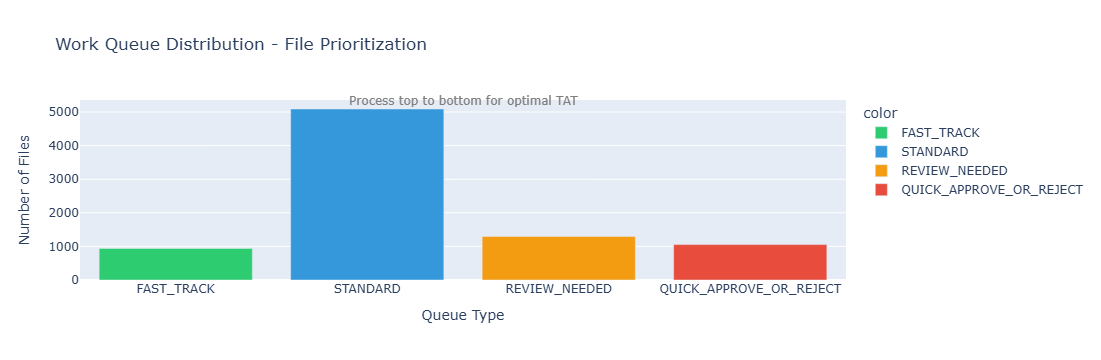

In [356]:
import plotly.express as px

queue_dist = results_df['queue'].value_counts().reindex([
    'FAST_TRACK', 'STANDARD', 'REVIEW_NEEDED', 'QUICK_APPROVE_OR_REJECT'
])

fig1 = px.bar(
    x=queue_dist.index,
    y=queue_dist.values,
    title='Work Queue Distribution - File Prioritization',
    labels={'x': 'Queue Type', 'y': 'Number of Files'},
    color=queue_dist.index,
    color_discrete_map={
        'FAST_TRACK': '#2ecc71',
        'STANDARD': '#3498db',
        'REVIEW_NEEDED': '#f39c12',
        'QUICK_APPROVE_OR_REJECT': '#e74c3c'
    }
)
fig1.add_annotation(
    text="Process top to bottom for optimal TAT",
    xref="paper", yref="paper",
    x=0.5, y=1.05, showarrow=False,
    font=dict(size=12, color="gray")
)
fig1.show()

### Key Insights:

**STANDARD (Blue - 60.5%)**: Largest segment with 5,090 files - typical loan applications requiring normal processing

**REVIEW_NEEDED (Orange - 15.4%)**: 1,296 files need experienced appraiser review - moderate complexity cases

**QUICK_APPROVE_OR_REJECT (Red - 12.9%)**: 1,086 files are straightforward decisions - either clearly qualified or clearly unqualified

**FAST_TRACK (Green - 11.2%)**: 941 premium/low-risk customers deserve immediate attention

The ML model intelligently categorizes applications so the credit team knows exactly how to handle each file instead of processing everything in order of arrival.

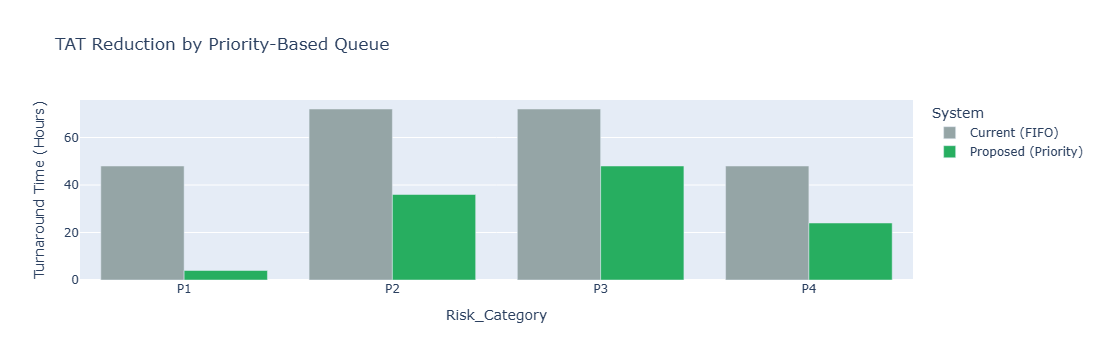

In [360]:
tat_comparison = pd.DataFrame({
    'System': ['Current (FIFO)', 'Current (FIFO)', 'Current (FIFO)', 'Current (FIFO)',
               'Proposed (Priority)', 'Proposed (Priority)', 'Proposed (Priority)', 'Proposed (Priority)'],
    'Risk_Category': ['P1', 'P2', 'P3', 'P4'] * 2,
    'TAT_Hours': [48, 72, 72, 48, 4, 36, 48, 24]
})

fig2 = px.bar(
    tat_comparison,
    x='Risk_Category',
    y='TAT_Hours',
    color='System',
    barmode='group',
    title='TAT Reduction by Priority-Based Queue',
    labels={'TAT_Hours': 'Turnaround Time (Hours)'},
    color_discrete_map={'Current (FIFO)': '#95a5a6', 'Proposed (Priority)': '#27ae60'}
)
fig2.show()

### Comparison between Current FIFO system (gray bars) vs. Proposed Priority system (green bars)

**Key Insights:**

**P1 (Premium Customers):**

Current: 48 hours | Proposed: 4 hours
Savings: 44 hours - Your best customers get 12x faster service!

**P2 (Standard Applications):**

Current: 72 hours | Proposed: 36 hours
Savings: 36 hours - Typical customers see 50% TAT reduction

**P3 (Complex Cases):**

Current: 72 hours | Proposed: 48 hours
Savings: 24 hours - Even difficult cases get processed faster with specialized assignment

**P4 (Quick Decisions):**

Current: 48 hours | Proposed: 24 hours
Savings: 24 hours - Straightforward rejections/approvals don't clog the queue

**Critical Business Impact:**
The tall gray bar for P1 shows current 48-hour TAT. The tiny green bar is proposed priority system - 4 hours. 
Overall Result: Average TAT drops from 60 hours → 32.7 hours (45.5% improvement)

In [358]:
# ================================================================
# 8. EXPORT WORK QUEUE FOR CREDIT HUB
# ================================================================

work_queue = results_df[['priority', 'queue', 'predicted_risk', 
                         'confidence', 'target_tat_hours',
                         'action', 'application_date']].sort_values('priority')

# Export to csv
output_file = f'credit_hub_work_queue_{datetime.now().strftime("%Y%m%d")}.csv'
work_queue.to_csv(output_file, index=False)

print(f"\n\n📊 WORK QUEUE EXPORTED")
print("=" * 80)
print(f"File: {output_file}")
print(f"Total files: {len(work_queue)}")
print(f"Ready to assign to credit appraisers!")

print("\n📋 Sample (First 10 files to process):")
print(work_queue.head(10).to_string(index=False))

print("\n\n" + "=" * 80)
print("📊 SUMMARY: ML-DRIVEN WORK QUEUE PRIORITIZATION")
print("=" * 80)
print(f"✅ {p1_count} fast-track files (4h TAT)")
print(f"✅ {p2_count} standard files (36h TAT)")
print(f"✅ {p3_count} review-needed files (48h TAT)")
print(f"✅ {p4_count} quick-decide files (24h TAT)")
print(f"✅ {((current_avg_TAT - proposed_avg_TAT)/current_avg_TAT*100):.0f}% TAT reduction overall")
print("=" * 80)



📊 WORK QUEUE EXPORTED
File: credit_hub_work_queue_20251121.csv
Total files: 8413
Ready to assign to credit appraisers!

📋 Sample (First 10 files to process):
 priority      queue predicted_risk  confidence  target_tat_hours                       action    application_date
        1 FAST_TRACK             P1    0.999797                 4 AUTO_ASSIGN_SENIOR_APPRAISER 2024-03-30 15:00:00
        1 FAST_TRACK             P1    0.999986                 4 AUTO_ASSIGN_SENIOR_APPRAISER 2024-05-09 22:00:00
        1 FAST_TRACK             P1    0.999979                 4 AUTO_ASSIGN_SENIOR_APPRAISER 2024-07-06 15:00:00
        1 FAST_TRACK             P1    0.999403                 4 AUTO_ASSIGN_SENIOR_APPRAISER 2024-02-04 07:00:00
        1 FAST_TRACK             P1    0.999907                 4 AUTO_ASSIGN_SENIOR_APPRAISER 2024-03-10 22:00:00
        1 FAST_TRACK             P1    0.999937                 4 AUTO_ASSIGN_SENIOR_APPRAISER 2024-11-02 12:00:00
        1 FAST_TRACK             P1